### Architecture of a Regression Model

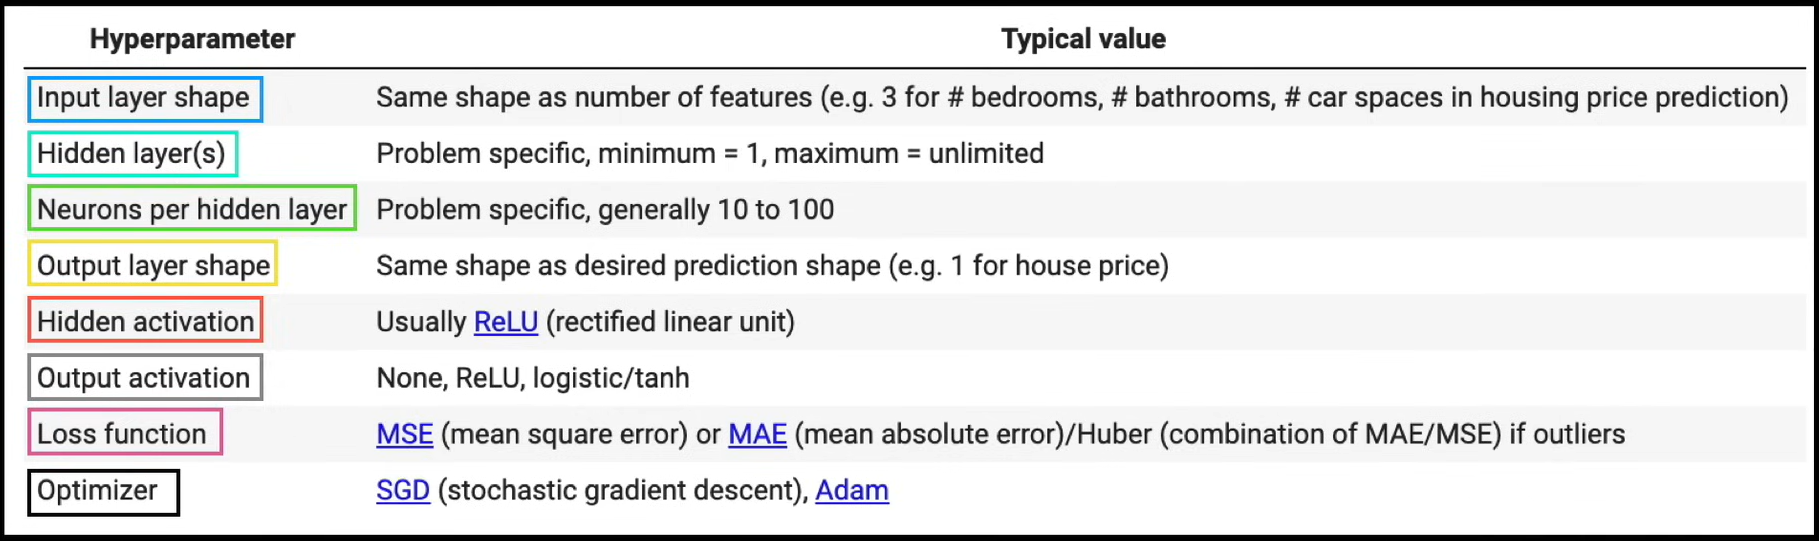

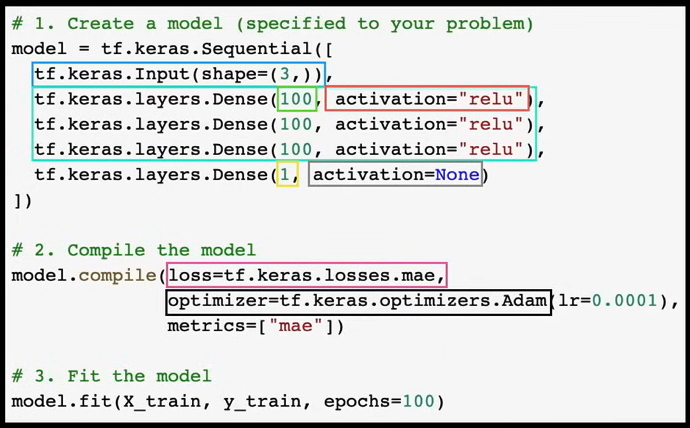

### Introduction to Regression with Neural Network in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simply it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating data to view and fit

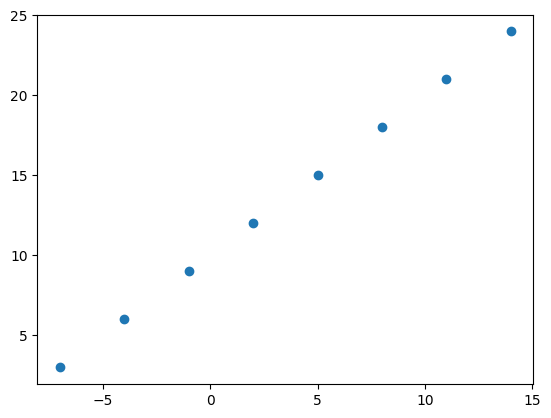

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y);

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes


In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape

In [6]:
X[0],y[0]

(-7.0, 3.0)

In [7]:
input_shape, output_shape

((8,), (8,))

In [8]:
X[0].shape, y[0].shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[1],y[1]

(-4.0, 6.0)

In [11]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
X[0].shape

TensorShape([])

In [13]:
y[0].shape

TensorShape([])

### Steps in  modelling with Tensorflow

1. **Creating a model** - define the input and output layers as well as hidden layers of a deep learning model.

---


2. **Compiling a model** - define the `loss function` (in other words, the function will tell our model how wrong it is) and the `optimizer` (tells our model how to improve the patterns it is learning) and `evaluation metrics` (what we can use to interpret the performance of our model).

---

3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

**Gradient Descent Equation**

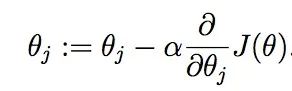

**Stochastic Gradient Descent**

- At a time a single training sample is passed through the network and its corresponding loss is computed.

- The parameters of all the layers of the network are updated after every training sample.

For example, if the training set contains 100 samples then the parameters are updated 100 times that is one time after every individual example is passed through the network.

The gradient descent equation and for stochastic gradient descent it is iterated over ’n’ times for ’n’ training samples in the training set.

**Batch Gradient Descent**

- The concept of carrying out gradient descent is the same as stochastic gradient descent.

- The difference is that instead of updating the parameters of the network after computing the loss of every training sample in the training set, the parameters are updated once that is after all the training.

For example, if the training dataset contains 100 training examples then the parameters of the neural network are updated once. The Gradient Descent Equation is iterated over only once.

**Mini Batch Gradient Descent Batch**

- This is a mixture of both stochastic and batch gradient descent.

- The training set is divided into multiple groups called batches. Each batch has a number of training samples in it.

- At a time a single batch is passed through the network which computes the loss of every sample in the batch and uses their average to update the parameters of the neural network.

For example, say the training set has 100 training examples which is divided into 5 batches with each batch containing 20 training examples. This means that the Gradient Descent Equation will be iterated over 5 times (number of batches).

**Neural network layers expect inputs to have at least two dimensions**:
1. The batch size (number of samples).

2. The feature size (number of features per sample).

---

`Weights` will be entirely automatically calculated based on the input and the output shapes.

Each type of layer works in a certain way. But the weights will be a matrix capable of transforming the input shape into the output shape by some mathematical operation.


---

If your input shape has only one dimension, you don't need to give it as a tuple, you give input_dim as a scalar number.

So, in your model, where your input layer has 3 elements, you can use any of these two:

- `input_shape=(3,)` -- The comma is necessary when you have only one dimension
- `input_dim = 3`

---
If you have 30 images of 50x50 pixels in RGB (3 channels),

the shape of your input data is (30,50,50,3).

Then your input layer tensor, must have this shape:

- Dense layers require inputs as `(batch_size, input_size)`

or
- `(batch_size, optional,...,optional, input_size)`


If you used input_shape=(50,50,3),

 when you print the model summary, it will show (None,50,50,3).

 The first dimension is the `batch size`, it's `None` because it can vary depending on how many examples you give for training. (If you defined the batch size explicitly, then the number you defined will appear instead of None)



---


---



---



model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(16,)))

model.add(tf.keras.layers.Dense(8))

`above can also be rewritten as 👇`

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(8, input_shape=(16,)))



---


> Note that you can also omit the initial `Input`. In that case the model doesn't have any weights until the first call to a training/evaluation method (since it isn't yet built):

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(8))

model.add(tf.keras.layers.Dense(4))

model.weights # not created yet


---


> Whereas if you specify an `Input`, the model gets built continuously as you are adding layers:

model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(16,)))

model.add(tf.keras.layers.Dense(8))

len(model.weights)  # Returns "2"


---


> When using the **delayed-build pattern** (no input shape specified), you can choose to manually build your model by calling `build(batch_input_shape)`:

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(8))

model.add(tf.keras.layers.Dense(4))

model.build((None, 16))

len(model.weights)  # Returns "4"


---


> Note that when using the delayed-build pattern (no input shape specified), the model gets built the first time you call `fit`, `eval`, or `predict`, or the first time you call the model on some input data.

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(8))

model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='sgd', loss='mse') # This builds the model for the first time

model.fit(x, y, batch_size=32, epochs=10)


---



In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)),
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,  # Mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
              metrics = ['mae'])

# Fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 883ms/step - loss: 19.5333 - mae: 19.5333
Epoch 2/5
1/1 [==============================] - 0s 29ms/step - loss: 19.2521 - mae: 19.2521
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 18.9708 - mae: 18.9708
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 18.6896 - mae: 18.6896
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 18.4083 - mae: 18.4083


In [15]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
# Try and make prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 162ms/step


array([[-17.46509]], dtype=float32)

#### Improving our Model

We can improve our model, by altering the steps we took to create the model.

1. **Creating a model** : Add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** : We might change the optimization function or perhaps the `learning rate` of the optimization function.

3. **Fitting a model** : We might fit a model for more `epochs` (leave it training for longer) or on more data (give the model more examples to learn from).

In [17]:
# Let's rebuild our model

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
tf.keras.layers.Dense(1, input_shape = (1,)),
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,  # Mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
              metrics = ['mae'])

# Fit the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 9.0693 - mae: 9.0693
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 8.9368 - mae: 8.9368
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 8.8043 - mae: 8.8043
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 8.6718 - mae: 8.6718
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 8.5393 - mae: 8.5393
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 8.4068 - mae: 8.4068
Epoch 7/100
1/1 [==============================] - 0s 52ms/step - loss: 8.2743 - mae: 8.2743
Epoch 8/100
1/1 [==============================] - 0s 41ms/step - loss: 8.1418 - mae: 8.1418
Epoch 9/100
1/1 [==============================] - 0s 33ms/step - loss: 8.0093 - mae: 8.0093
Epoch 10/100
1/1 [==============================] - 0s 36ms/step - loss: 7.8768 - mae: 7.8768
Epoch 11/100
1/1 [==============================] - 0s 49ms/step - loss

In [18]:
model.predict([17.])

1/1 [==============================] - 0s 143ms/step


array([[30.037832]], dtype=float32)

In [19]:
# Let's rebuild our model

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
                              tf.keras.layers.Dense(1, input_shape = (1,), activation = 'relu'),
                              tf.keras.layers.Dense(1, input_shape = (1,), activation = 'relu')
                            ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,  # Mean absolute error
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Fit the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 940ms/step - loss: 12.9633 - mae: 12.9633
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.7944 - mae: 12.7944
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6154 - mae: 12.6154
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4285 - mae: 12.4285
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.2319 - mae: 12.2319
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0237 - mae: 12.0237
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 11.8020 - mae: 11.8020
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 11.5647 - mae: 11.5647
Epoch 9/100
1/1 [==============================] - 0s 28ms/step - loss: 11.3096 - mae: 11.3096
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 11.0343 - mae: 11.0343
Epoch 11/100
1/1 [==============================

In [20]:
model.predict([17.])

1/1 [==============================] - 0s 241ms/step


array([[32.10671]], dtype=float32)

In [21]:
# Let's rebuild our model

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
                              tf.keras.layers.Dense(100, input_shape = (1,), activation = None),
                              tf.keras.layers.Dense(1, input_shape = (1,))
                            ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,  # Mean absolute error
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae'])

# Fit the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.1525 - mae: 12.1525
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 11.1035 - mae: 11.1035
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.0440 - mae: 10.0440
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 8.9691 - mae: 8.9691
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 7.8726 - mae: 7.8726
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9152 - mae: 6.9152
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 7.1338 - mae: 7.1338
Epoch 8/100
1/1 [==============================] - 0s 29ms/step - loss: 7.4560 - mae: 7.4560
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 7.7275 - mae: 7.7275
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 7.6062 - mae: 7.6062
Epoch 11/100
1/1 [==============================] - 0s 19ms/step 

In [22]:
model.predict([17.0])

1/1 [==============================] - 0s 113ms/step


array([[27.347738]], dtype=float32)

In [23]:
model.predict([10.0])

1/1 [==============================] - 0s 36ms/step


array([[20.198526]], dtype=float32)

#### Evaluating a model

In practice, a typical workflow you'll go through when building a neural network is:

```
Build a model -> Fit it -> Evaluate it -> Tweak the model -> Fit it -> Evaluate it -> Tweak the model -> Fit it -> ...
```

When it comes to evaluation... there are 3 words you should remember
> "Visualize, Visualize, Visualize"

It's a good idea to visualize:
- `The data` : What data are we working with? What does it look like?
- `The model itself` : What does our model look like?
- `The training of the model` : How does the model performs while it learns?
- `The predictions of the model` : How do the predictions of a model line up against the ground truth (the original data)?

In [24]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

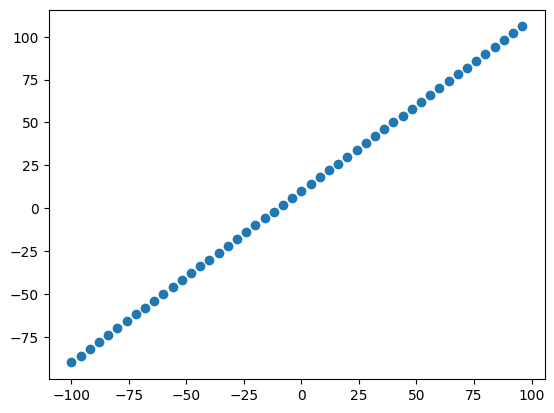

In [26]:
# Let's visualize the data
plt.scatter(X, y);

#### The 3 sets...
- Training set : 70 to 80 %
- Validation set : 10 to 15%
- Test set : 10 to 15%

In [27]:
len(X)

50

In [28]:
X_train = X[:40] # 80% of the data
X_test = X[40:] # 20% of the data

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

#### Visualizing the data

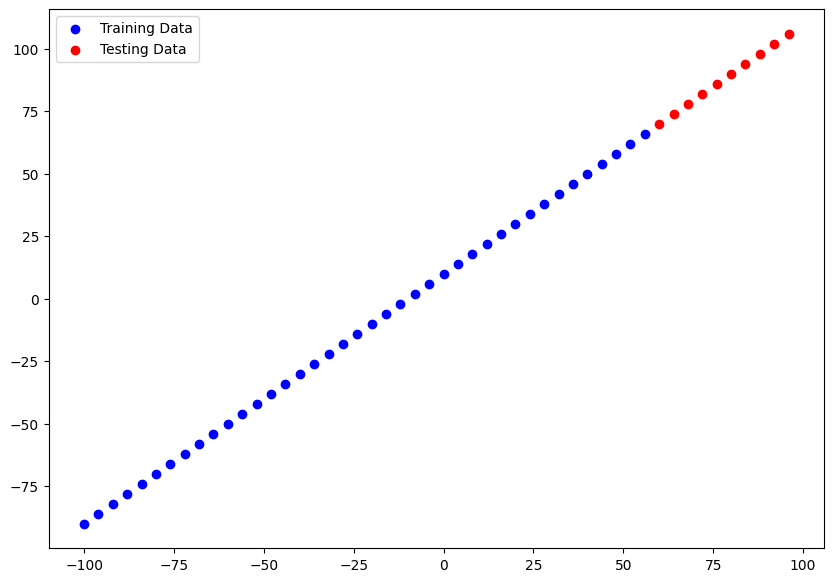

In [29]:
plt.figure(figsize=(10,7))

# Plot the training data in blue
plt.scatter(X_train, y_train, c='b', label='Training Data');

# Plot the testing data in blue
plt.scatter(X_test, y_test, c='r', label='Testing Data');

plt.legend();

In [30]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

#### Visualizing the model

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - Total number of parameters in the model.
* Trainable params - These are the parameters (patterns) the model can update as it trains.
* Non-trainable params - These parameters aren't updated during the training (this is typical when you bring in already learned pattern or parameter from other model during **transfer learning**).

In [32]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1,))
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               200       
                                                                 
Total params: 200 (800.00 Byte)
Trainable params: 200 (800.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
tf.random.set_seed(42)
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,),name='input_layer'),
    tf.keras.layers.Dense(1, input_shape=(1,),name='output_layer')
], name="model_0")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae'])

In [35]:
model.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

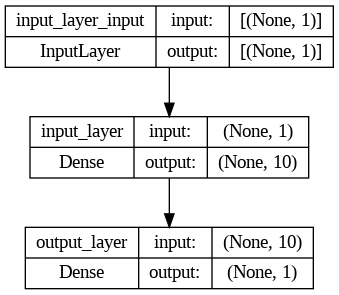

In [37]:
from keras.utils import plot_model

plot_model(model=model, show_shapes=True)

#### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_preds` (ground truth versus your model's predictions).

In [38]:
# Make some predictions
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 57ms/step


array([[ 71.44129 ],
       [ 75.52794 ],
       [ 79.61459 ],
       [ 83.70125 ],
       [ 87.7879  ],
       [ 91.87455 ],
       [ 95.961205],
       [100.04786 ],
       [104.13451 ],
       [108.22116 ]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **NOTE**: If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [40]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_preds):
    '''
        Plots training data, test data and compare predictions to the ground truth labels.
    '''
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c = 'b', label = 'Training Dataset')
    plt.scatter(test_data, test_labels, c = 'g', label = 'Test Dataset')
    plt.scatter(test_data, predictions, c ='r', label = 'Predictions')
    plt.legend();

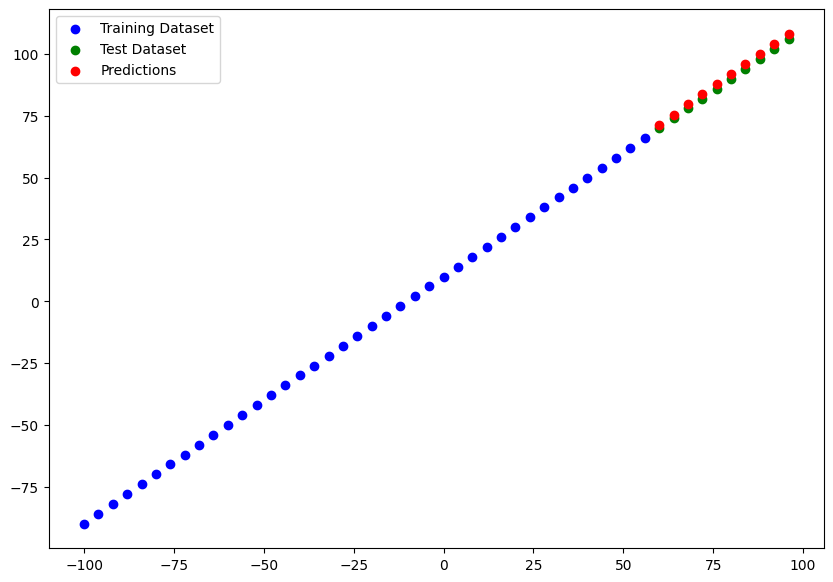

In [41]:
plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = y_preds)

#### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression problem, two of the main metrics:

* MAE - Mean Absolute Error, "On an average, how wrong is each of my model's predictions"
* MSE - Mean Squared Error, "Square the average errors"

**Huber Loss**:

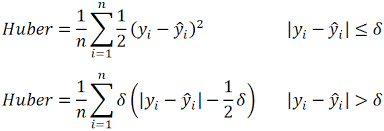

In [42]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 163ms/step - loss: 1.8312 - mae: 1.8312


[1.8312263488769531, 1.8312263488769531]

In [43]:
y_preds

array([[ 71.44129 ],
       [ 75.52794 ],
       [ 79.61459 ],
       [ 83.70125 ],
       [ 87.7879  ],
       [ 91.87455 ],
       [ 95.961205],
       [100.04786 ],
       [104.13451 ],
       [108.22116 ]], dtype=float32)

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.846966 , 13.883237 , 11.754163 , 10.45975  , 10.       ,
       10.37491  , 11.584482 , 13.6287155, 16.507605 , 20.22116  ],
      dtype=float32)>

In [46]:
y_test - y_preds

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ -1,   3,   7,  11,  15,  19,  23,  27,  31,  35],
       [ -5,  -1,   3,   7,  11,  15,  19,  23,  27,  31],
       [ -9,  -5,  -1,   3,   7,  11,  15,  19,  23,  27],
       [-13,  -9,  -5,  -1,   3,   7,  11,  15,  19,  23],
       [-17, -13,  -9,  -5,  -1,   3,   7,  11,  15,  19],
       [-21, -17, -13,  -9,  -5,  -1,   3,   7,  11,  15],
       [-25, -21, -17, -13,  -9,  -5,  -1,   3,   7,  11],
       [-30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6],
       [-34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2],
       [-38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2]], dtype=int32)>

In [47]:
y_preds - y_test

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  1,  -3,  -7, -11, -15, -19, -23, -27, -31, -35],
       [  5,   1,  -3,  -7, -11, -15, -19, -23, -27, -31],
       [  9,   5,   1,  -3,  -7, -11, -15, -19, -23, -27],
       [ 13,   9,   5,   1,  -3,  -7, -11, -15, -19, -23],
       [ 17,  13,   9,   5,   1,  -3,  -7, -11, -15, -19],
       [ 21,  17,  13,   9,   5,   1,  -3,  -7, -11, -15],
       [ 25,  21,  17,  13,   9,   5,   1,  -3,  -7, -11],
       [ 30,  26,  22,  18,  14,  10,   6,   2,  -2,  -6],
       [ 34,  30,  26,  22,  18,  14,  10,   6,   2,  -2],
       [ 38,  34,  30,  26,  22,  18,  14,  10,   6,   2]], dtype=int32)>

In [48]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 71.44129 ],
       [ 75.52794 ],
       [ 79.61459 ],
       [ 83.70125 ],
       [ 87.7879  ],
       [ 91.87455 ],
       [ 95.961205],
       [100.04786 ],
       [104.13451 ],
       [108.22116 ]], dtype=float32)>

In [49]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [50]:
y_preds = tf.squeeze(y_preds)
y_preds

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 71.44129 ,  75.52794 ,  79.61459 ,  83.70125 ,  87.7879  ,
        91.87455 ,  95.961205, 100.04786 , 104.13451 , 108.22116 ],
      dtype=float32)>

In [51]:
# Calculate the mean absolute error : PROBLEM was with the shape
mae_0 = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_preds)
mae_0

<tf.Tensor: shape=(), dtype=float32, numpy=1.8312256>

In [52]:
# Calculate the mean squared error
mse_0 = tf.metrics.mean_squared_error(y_true = y_test, y_pred = y_preds)
mse_0

<tf.Tensor: shape=(), dtype=float32, numpy=3.4153335>

In [53]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true = y_true, y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true = y_true, y_pred = tf.squeeze(y_pred))

#### Running experiments to improve our model

1. `model_1` : same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` : 2 layers, trained for 100 epochs.
3. `model_3` : 2 layer, trained for 500 epochs.

In [54]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [55]:
tf.random.set_seed(42)
# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)),
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 63.9001 - mae: 63.9001
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 28.9402 - mae: 28.9402
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 10.5960 - mae: 10.5960
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.1261 - mae: 13.1261
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 12.1893 - mae: 12.1893
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4329 - mae: 9.4329
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5749 - mae: 8.5749
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0607 - mae: 9.0607
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 18.7313 - mae: 18.7313
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1149 - mae: 10.1149
Epoch 11/100
2/2 [==============================] - 0s 9ms/st

In [56]:
# Make and plot predictions with model
y_preds_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 49ms/step


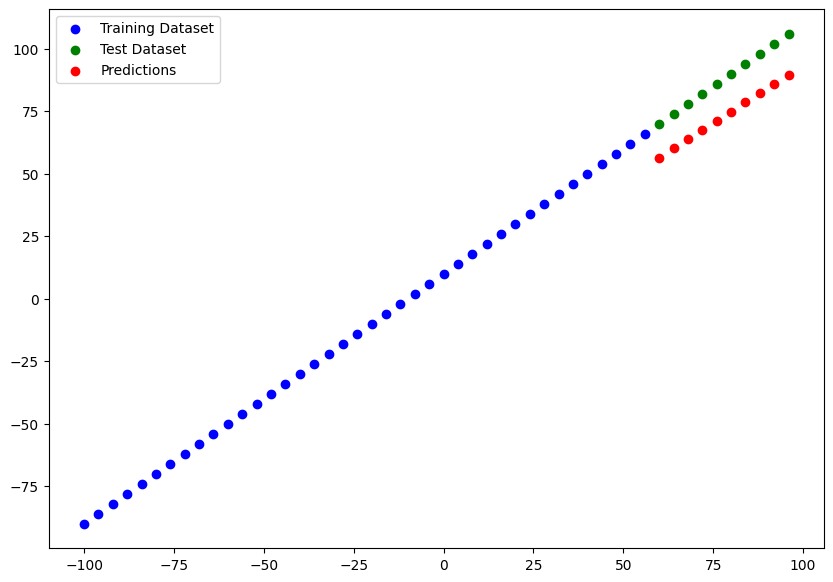

In [57]:
plot_predictions(predictions = y_preds_1)

In [58]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.96582>,
 <tf.Tensor: shape=(), dtype=float32, numpy=224.82014>)

**Build model_2**

2 dense layers, trained for 100 epochs

In [59]:
tf.random.set_seed(42)
# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1, input_shape=(1,)),
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mse'])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 38.5890 - mse: 2210.7253
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 23.6248 - mse: 719.2579
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 28.7195 - mse: 1234.7534
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 28.1614 - mse: 1176.3578
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 13.7128 - mse: 229.1295
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0207 - mse: 134.2051
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 12.0129 - mse: 181.3949
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 10.8452 - mse: 132.0801
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 37.4251 - mse: 2154.9790
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 25.1033 - mse: 883.7491
Epoch 11/100
2/2 [====================

1/1 [==============================] - 0s 102ms/step


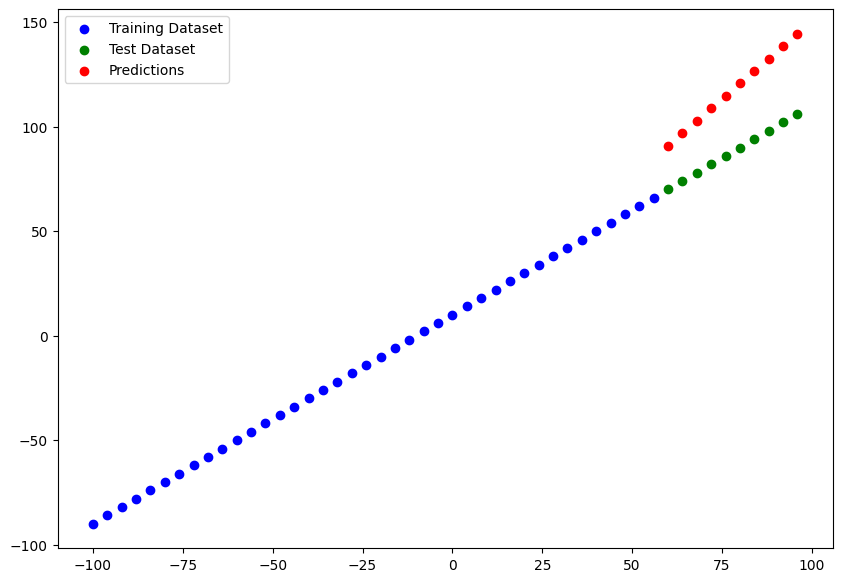

In [60]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [61]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.710861>,
 <tf.Tensor: shape=(), dtype=float32, numpy=913.8283>)

**Build model_3**

In [62]:
tf.random.set_seed(42)
# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1, input_shape=(1,)),
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 20ms/step - loss: 34.2024 - mae: 34.2024
Epoch 2/500
2/2 [==============================] - 0s 12ms/step - loss: 25.3320 - mae: 25.3320
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 31.5402 - mae: 31.5402
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 22.9725 - mae: 22.9725
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 13.7474 - mae: 13.7474
Epoch 6/500
2/2 [==============================] - 0s 13ms/step - loss: 11.0372 - mae: 11.0372
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 12.0236 - mae: 12.0236
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 10.8436 - mae: 10.8436
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 37.3742 - mae: 37.3742
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 25.0598 - mae: 25.0598
Epoch 11/500
2/2 [==============================] - 0

1/1 [==============================] - 0s 468ms/step


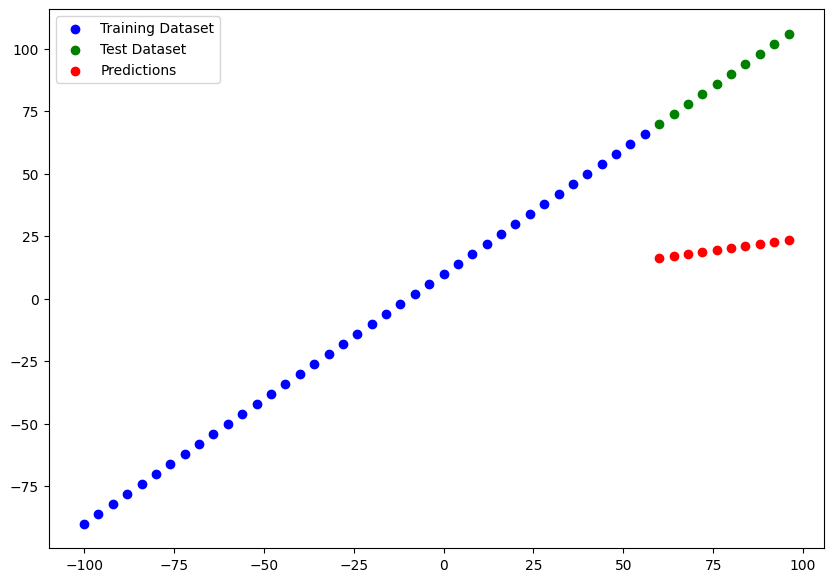

In [63]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

In [64]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.947266>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4701.511>)

#### Comparing the results of our experiments

In [65]:
import pandas as pd

model_results = [["Model_0",mae_0.numpy(),mse_0.numpy()],
                 ["Model_1",mae_1.numpy(),mse_1.numpy()],
                 ["Model_2",mae_2.numpy(),mse_2.numpy()],
                 ["Model_3",mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=['models','mae','mse'])
all_results

,models,mae,mse
0,Model_0,1.831226,3.415334
1,Model_1,14.965820,224.820145
2,Model_2,29.710861,913.828308
3,Model_3,67.947266,4701.511230


In [66]:
model.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And in doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!!

📔 **Resource**: As you build more models, you'll have to look into using:

- `TensorBoard` : A component of the Tensorflow library to help track modelling experiments.

- `Weights and Biases` : A tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

#### Saving our model

Saving our models allow us to use them outside of Google Colab (or wherever they are trained) such as in a web application or a mobile application.

There are two main formats we can save our models to:
1. The SavedModel format
2. The HDF5 format

In [67]:
# SavedModel Format
model.save('best_model_SavedModel_format') #model_name.save('file_name')

In [68]:
# HDF5 Format
model.save('best_model_HDF5_format.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Loading the saved model

In [69]:
# Loading the SavedModel Format
loaded_saved_model_format = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_saved_model_format.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
# Comparing model_0 predictions with SavedModel format model predictions
model_preds = model.predict(X_test)
loaded_saved_model_format_preds = loaded_saved_model_format(X_test)
model_preds == loaded_saved_model_format_preds

1/1 [==============================] - 0s 49ms/step


<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

In [72]:
mae(y_true = y_test, y_pred = model_preds)

<tf.Tensor: shape=(), dtype=float32, numpy=1.8312256>

In [73]:
mae(y_true = y_test, y_pred = loaded_saved_model_format_preds)

<tf.Tensor: shape=(), dtype=float32, numpy=1.8312256>

In [74]:
# Loading the .h5 Format
loaded_h5_format = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_format.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
model.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
# Comparing model_0 predictions with HDF5 format model predictions
model_preds = model.predict(X_test)
loaded_h5_format_preds = loaded_h5_format(X_test)
model_preds == loaded_h5_format_preds

1/1 [==============================] - 0s 43ms/step


<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

In [77]:
mae(y_true = y_test, y_pred = model_preds) == mae(y_true = y_test, y_pred = loaded_h5_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

#### Download a model (or any other file) from Google Colab

1. You can go to the "files 📂" tab and right click on the file you're after and then click `download`.

2. Use code (See the cell below)

3. Save it to google drive by connecting Google Drive and copying it there (See the 2nd cell below)

In [78]:
# # Download a file from Google Colab
# from google.colab import files
# files.download('/content/best_model_HDF5_format.h5')

In [79]:
# # Save a file from Google Colab to Google Drive (Requires mounting of Google Drive)
# !cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Folder_Name

In [80]:
# !ls /content/drive/MyDrive/Folder_Name

### A larger Example

In [82]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [85]:
insurance.sex, insurance.age

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [90]:
# One-Hot Encoding (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

insurance_one_hot = pd.get_dummies(insurance)

# Convert boolean values to integers
insurance_one_hot = insurance_one_hot.astype(int)

insurance_one_hot.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [91]:
# Create X and y values (Features and labels)
X = insurance_one_hot.drop('charges',axis=1)
y = insurance_one_hot['charges']

# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [92]:
# View y
y.head()

0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64

In [95]:
# Scikit learn train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

len(X_train), len(y_test),len(X)

(1070, 268, 1338)

In [96]:
0.2*1338

267.6

In [97]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19,2,1,0,1,0,0,1,0,0
1285,47,24,0,1,0,1,0,1,0,0,0
1142,52,24,0,1,0,1,0,0,0,1,0
969,39,34,5,1,0,1,0,0,0,1,0
486,54,21,3,1,0,1,0,0,1,0,0


In [100]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8557.6650 - mae: 8557.6650
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7841.2881 - mae: 7841.2881
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7598.2617 - mae: 7598.2617
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7753.1519 - mae: 7753.1519
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7754.3179 - mae: 7754.3179
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7554.9995 - mae: 7554.9995
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7679.6338 - mae: 7679.6338
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7741.7212 - mae: 7741.7212
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7562.8550 - mae: 7562.8550
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7664.6963 - mae: 7664.6963

In [101]:
# Check the results of insurance_model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 8757.2559 - mae: 8757.2559


[8757.255859375, 8757.255859375]

In [104]:
y_train.median(), y_train.mean()

(9574.5, 13345.596261682243)

In [109]:
# Improve our model... our model is not performing well...

# Re-build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [110]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4807.2222 - mae: 4807.2222


[4807.22216796875, 4807.22216796875]

In [111]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8757.2559 - mae: 8757.2559


[8757.255859375, 8757.255859375]

In [115]:
# Insurance Model - 3

# Re-build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
insurance_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [116]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3507.2576 - mae: 3507.2576


[3507.257568359375, 3507.257568359375]

In [117]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8757.2559 - mae: 8757.2559


[8757.255859375, 8757.255859375]

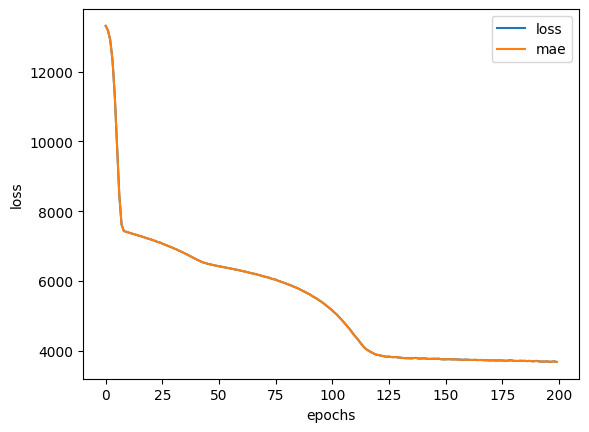

In [120]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot();
plt.ylabel('loss');
plt.xlabel('epochs');

🤔 **Question:** How long should I train for?

> It depends... Tensorflow has a solution!! It's called the `EarlyStopping Callback`, which is a Tensorflow component you can add to your model to stop training once it stops improving a certain metric.

#### Preprocessing Data (Normalization and Standardization)

**Get data ready**
1. Turn all data into numbers (neural networks can't handle strings)
2. Make sure all of your tensors are in the right shape
3. Scale features (normalize and standardize, neural networks tend to prefer normalization)

In [122]:
X.sample(5)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
386,58,39,0,1,0,1,0,0,0,1,0
9,60,25,0,1,0,1,0,0,1,0,0
942,18,40,0,1,0,1,0,1,0,0,0
541,20,31,2,1,0,1,0,0,0,1,0
354,18,38,0,1,0,1,0,0,0,1,0


<Axes: ylabel='Frequency'>

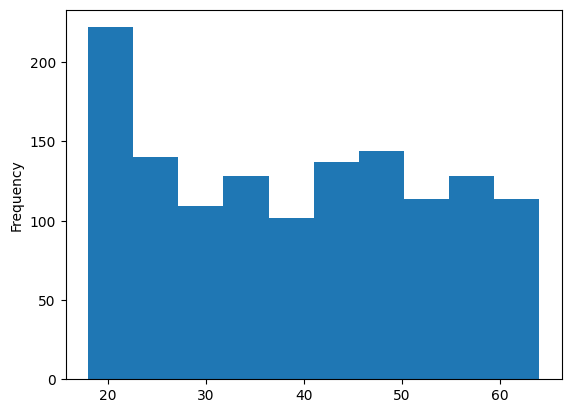

In [123]:
X.age.plot(kind='hist')

<Axes: ylabel='Frequency'>

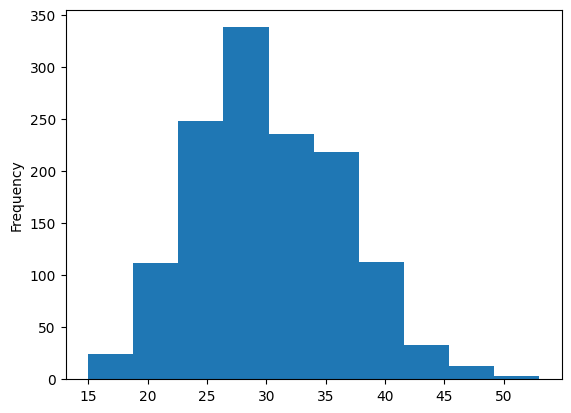

In [124]:
X.bmi.plot(kind='hist')

In [125]:
X.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [126]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
   (MinMaxScaler(),['age','bmi','children']), # turn all values in these columns between 0 and 1
   (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

# Create X and y
X = insurance.drop('charges',axis=1)
y = insurance['charges']

# Build our train_test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transforming training and test data with normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [128]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [130]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [131]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes...

In [132]:
insurance_model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 100)               1200      
                                                                 
 dense_24 (Dense)            (None, 10)                1010      
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [133]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
insurance_model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [134]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3436.3521 - mae: 3436.3521


[3436.35205078125, 3436.35205078125]

In [137]:
# Insurance model_2 results
# 9/9 [==============================] - 0s 2ms/step - loss: 4807.2222 - mae: 4807.2222
# [4807.22216796875, 4807.22216796875]